In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

<Figure size 720x72 with 0 Axes>

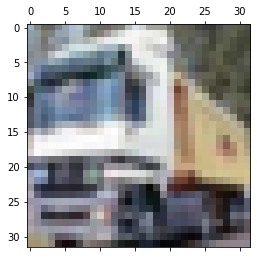

In [8]:
def showImg(index):
    plt.figure(figsize=(10,1))
    plt.matshow(X_train[index])

showImg(1)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes=10,dtype="float32"
)

In [16]:
model = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
]);

model.compile(optimizer="SGD",
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])




In [21]:
model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9364 - accuracy: 0.6722
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9069 - accuracy: 0.6838
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8831 - accuracy: 0.6912
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8573 - accuracy: 0.7022
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8346 - accuracy: 0.7117
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8122 - accuracy: 0.7150
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7901 - accuracy: 0.7248
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7697 - accuracy: 0.7273
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7486 - accuracy: 0.7417
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.728

In [23]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10,dtype="float32"
)

In [31]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 0.9503 - accuracy: 0.6751


[0.9503472447395325, 0.6751000285148621]

In [32]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[1.2386997e-03, 7.0458292e-03, 1.6879136e-02, ..., 1.2625761e-04,
        2.3695106e-02, 3.9685443e-03],
       [4.0706975e-04, 1.0616807e-03, 1.5468848e-06, ..., 4.0142809e-10,
        9.9852604e-01, 2.7705316e-06],
       [3.6715563e-02, 7.4816309e-02, 3.1075694e-04, ..., 3.9692950e-05,
        8.8459450e-01, 3.1188189e-03],
       ...,
       [2.8260543e-05, 5.4313125e-05, 1.2618837e-01, ..., 2.7937520e-02,
        2.0124771e-04, 8.4841397e-04],
       [2.7050192e-02, 4.7701389e-01, 1.5600305e-03, ..., 7.0630084e-03,
        1.2439936e-02, 1.1295532e-03],
       [8.4930609e-05, 1.0089449e-02, 4.6879710e-03, ..., 7.8291613e-01,
        3.6857833e-05, 1.8166350e-04]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [35]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)